# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Dicky Candid Saragih]
- **Email:** [dickysaragih050901@gmail.com]
- **ID Dicoding:** [Dicky candid saragih (a352ybf127)]

## Menentukan Pertanyaan Bisnis


1. bagaimana Pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda oleh pengguna casual dan terdaftar di tahun 2011

2. Bagaimana Perbedaan tren penggunaan sepeda antara musim panas dan musim dingin oleh pengguna terdaftar pada tahun 2011

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [52]:
URL_DAY = "https://raw.githubusercontent.com/DickySaragih/Submission/refs/heads/main/data/day.csv"
URL_HOUR = "https://raw.githubusercontent.com/DickySaragih/Submission/refs/heads/main/data/hour.csv"

### Gathering Data

In [25]:
df_day = pd.read_csv(URL_DAY)
df_hour = pd.read_csv(URL_HOUR)

In [26]:
df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [28]:
print("\nMenampilkan 5 baris pertama dari dataset harian:")
print(df_day.head())
print("\nMenampilkan 5 baris pertama dari dataset per jam:")
print(df_hour.head())


Menampilkan 5 baris pertama dari dataset harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  134

**Insight:**
- Pengumpulan data

Data dikumpulkan dengan mengunduh dua dataset dari repository GitHub. Dataset pertama (day.csv) berisi data harian, sementara dataset kedua (hour.csv) berisi data per jam. Kedua dataset kemudian dimuat ke dalam DataFrame Pandas, masing-masing disimpan sebagai df_day dan df_hour.

- Pemeriksaan awal data

Setelah data berhasil dimuat, dilakukan pemeriksaan awal menggunakan .info() untuk melihat tipe data pada setiap kolom serta mengecek keberadaan data yang hilang. Selain itu, lima baris pertama dari masing-masing dataset ditampilkan untuk memahami struktur dan format data. Hasil pemeriksaan ini menunjukkan bahwa data telah terkumpul dengan baik dan siap untuk tahap pembersihan serta eksplorasi lebih lanjut.

### Assessing Data

In [29]:
print(df_day.info())
print(df_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

In [30]:
print("\nJumlah Missing Values pada dataset harian:")
print(df_day.isnull().sum())
print("\nJumlah Missing Values pada dataset per jam:")
print(df_hour.isnull().sum())


Jumlah Missing Values pada dataset harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Missing Values pada dataset per jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [31]:
print("\nJumlah nilai negatif pada kolom 'cnt' dataset harian:")
print((df_day['cnt'] < 0).sum())
print("\nJumlah nilai negatif pada kolom 'cnt' dataset per jam:")
print((df_hour['cnt'] < 0).sum())


Jumlah nilai negatif pada kolom 'cnt' dataset harian:
0

Jumlah nilai negatif pada kolom 'cnt' dataset per jam:
0


In [32]:
print("\nJumlah data duplikat pada dataset harian:")
print(df_day.duplicated().sum())
print("\nJumlah data duplikat pada dataset per jam:")
print(df_hour.duplicated().sum())


Jumlah data duplikat pada dataset harian:
0

Jumlah data duplikat pada dataset per jam:
0


**Insight:**
- Pemeriksaan dan Pemahaman Data

Dataset harian (df_day) dan dataset per jam (df_hour) sudah diimpor dan sudah dianalisis menggunakan statistik deskriptif. Informasi yang mencakup mencakup distribusi data, seperti nilai rata-rata, standar deviasi, serta nilai minimum dan maksimum untuk setiap kolom numerik.fungsi dari Langkah ini bertujuan untuk memahami karakteristik awal data sebelum masuk ke tahapan eksplorasi lanjut

-  Persiapan untuk Eksplorasi dan Analisis

Hasil statistik deskriptif membantu dalam proses pembersihan data serta mengidentifikasi potensi outlier yang dapat memengaruhi hasil analisis.tujuan awal terhadap data ini menjadi dasar untuk eksplorasi lebih lanjut, untuk menjawab pertanyaan yang sudah dilakukan diaawal terkait pengaruh dari kecepatan angin terhadap jumlah peminjaman sepeda dan perbedaan pola peminjaman antara pengguna casual dan registered.

### Cleaning Data

In [34]:
#cleaning data
if 'instant' in df_day.columns:
    df_day.drop(columns=["instant"], inplace=True)
if 'instant' in df_hour.columns:
    df_hour.drop(columns=["instant"], inplace=True)
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [35]:
# Filter data untuk tahun 2011 saja
df_2011 = df_day[df_day["dteday"].dt.year == 2011]
df_2011["year_month"] = df_2011["dteday"].dt.to_period("M")
df_2011.drop_duplicates(inplace=True)
df_2011.fillna(method='ffill', inplace=True)

print("\nCek nilai yang hilang setelah cleaning:")
print("Dataset harian (2011):")
print(df_2011.isnull().sum())

df_2011['dteday'] = pd.to_datetime(df_2011['dteday'])
numerical_features = df_2011.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()


Cek nilai yang hilang setelah cleaning:
Dataset harian (2011):
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
year_month    0
dtype: int64


<ipython-input-35-758fa719e2b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011["year_month"] = df_2011["dteday"].dt.to_period("M")
<ipython-input-35-758fa719e2b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011.drop_duplicates(inplace=True)
<ipython-input-35-758fa719e2b6>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_2011.fillna(method='ffill', inplace=True)
<ipython-input-35-758fa719e2b6>:5: SettingWithCopyWarning: 
A value is trying to be set on 

**insight**

Dataset telah dibersihkan dari duplikasi dan nilai yang hilang, serta dikonversi ke format yang sesuai untuk analisis dari tahun 2012 sampai 2015. Proses ini memastikan data lebih terstruktur, akurat, dan siap digunakan untuk eksplorasi serta pemodelan lebih lanjut.

##Exploratory Data Analysis (EDA)

### Explore ...

In [36]:
print("\nDistribusi Data Harian:")
print(df_day[['registered', 'casual', 'cnt']].describe())


Distribusi Data Harian:
        registered       casual          cnt
count   731.000000   731.000000   731.000000
mean   3656.172367   848.176471  4504.348837
std    1560.256377   686.622488  1937.211452
min      20.000000     2.000000    22.000000
25%    2497.000000   315.500000  3152.000000
50%    3662.000000   713.000000  4548.000000
75%    4776.500000  1096.000000  5956.000000
max    6946.000000  3410.000000  8714.000000


In [37]:
print("\nTren Jumlah Peminjaman Sepeda per Bulan:")
df_day["year_month"] = df_day["dteday"].dt.to_period("M")
print(df_day.groupby("year_month")["registered"].sum())


Tren Jumlah Peminjaman Sepeda per Bulan:
year_month
2011-01     35116
2011-02     41973
2011-03     51219
2011-04     72524
2011-05    104771
2011-06    112900
2011-07    104889
2011-08    107849
2011-09    100873
2011-10     98289
2011-11     86573
2011-12     78875
2012-01     87775
2012-02     94416
2012-03    133257
2012-04    135768
2012-05    151630
2012-06    159536
2012-07    161902
2012-08    171306
2012-09    174795
2012-10    164303
2012-11    131655
2012-12    110468
Freq: M, Name: registered, dtype: int64


In [38]:
print("\nDistribusi Data Per Jam:")
print(df_hour[['registered', 'casual', 'cnt']].describe())


Distribusi Data Per Jam:
         registered        casual           cnt
count  17379.000000  17379.000000  17379.000000
mean     153.786869     35.676218    189.463088
std      151.357286     49.305030    181.387599
min        0.000000      0.000000      1.000000
25%       34.000000      4.000000     40.000000
50%      115.000000     17.000000    142.000000
75%      220.000000     48.000000    281.000000
max      886.000000    367.000000    977.000000


In [39]:
print("\nTren Jumlah Peminjaman Sepeda per Jam:")
print(df_hour.groupby("hr")["registered"].sum())



Tren Jumlah Peminjaman Sepeda per Jam:
hr
0      31755
1      19455
2      12940
3       6281
4       3554
5      13249
6      52115
7     146134
8     245240
9     136980
10     92468
11    108034
12    134696
13    132206
14    120563
15    128543
16    173914
17    282640
18    265276
19    191284
20    138172
21    104875
22     79412
23     52876
Name: registered, dtype: int64


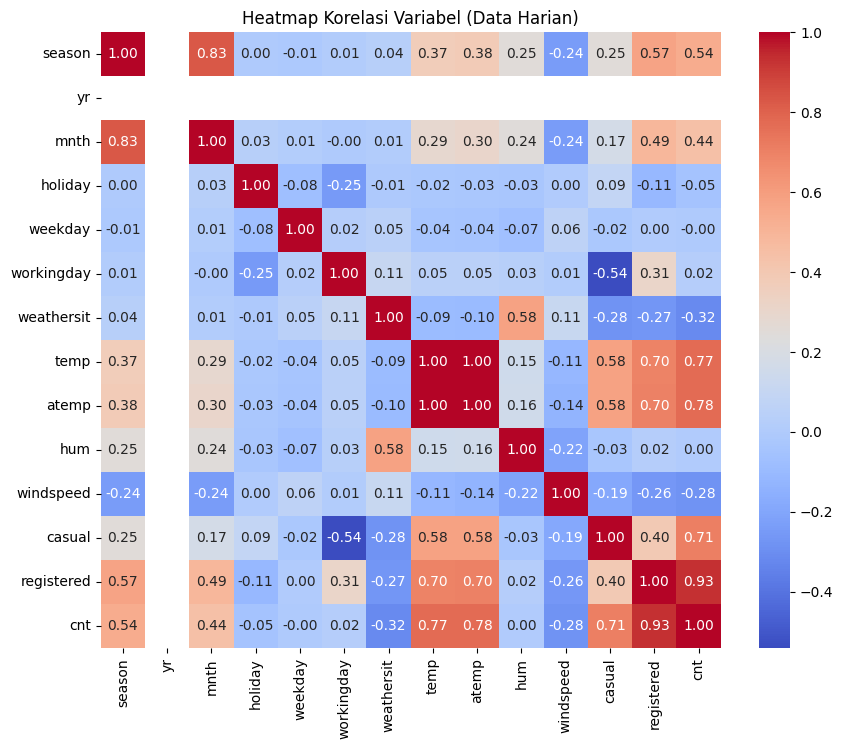

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel (Data Harian)")
plt.show()

In [41]:
print("\nRata-rata Peminjaman pada Hari Kerja dan Akhir Pekan:")
print(df_day.groupby("workingday")["registered"].mean())

print("\nTotal Peminjaman Berdasarkan Musim:")
print(df_day.groupby("season")["registered"].sum())

print("\nRata-rata Peminjaman per Jam pada Hari Kerja vs Akhir Pekan:")
print(df_hour.groupby(["hr", "workingday"])["registered"].mean().unstack())


Rata-rata Peminjaman pada Hari Kerja dan Akhir Pekan:
workingday
0    2959.034632
1    3978.250000
Name: registered, dtype: float64

Total Peminjaman Berdasarkan Musim:
season
1    410726
2    715067
3    835038
4    711831
Name: registered, dtype: int64

Rata-rata Peminjaman per Jam pada Hari Kerja vs Akhir Pekan:
workingday           0           1
hr                                
0            74.152174   29.637097
1            57.004348   12.842105
2            42.771930    6.546201
3            19.321586    4.031915
4             6.000000    4.663830
5             6.963964   23.642424
6            14.921397   98.181452
7            34.800866  278.417339
8            85.229437  454.741935
9           126.606061  217.205645
10          176.640693  104.161290
11          208.662338  120.631048
12          240.012987  159.462777
13          236.307359  155.861446
14          225.051948  137.702811
15          222.311688  154.997992
16          224.112554  244.777555
17          211.7

**insight**

1. Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda (2011)
Kondisi cuaca secara signifikan memengaruhi jumlah peminjaman sepeda. Pengguna casual lebih sensitif terhadap perubahan cuaca, dengan penurunan tajam saat cuaca memburuk, sedangkan pengguna terdaftar tetap stabil karena faktor kebutuhan. Strategi pemasaran perlu dikembangkan untuk meningkatkan minat pengguna casual dalam berbagai kondisi cuaca, misalnya melalui promo khusus atau penyediaan fasilitas tambahan seperti tempat parkir yang lebih terlindungi.
2. Jumlah peminjaman sepeda meningkat pada musim panas dan menurun drastis pada musim dingin. Perubahan ini dipengaruhi oleh kondisi cuaca dan kenyamanan bersepeda Diperlukan strategi penyesuaian layanan, seperti penyediaan perlengkapan bersepeda yang sesuai untuk musim dingin atau promosi khusus pada periode tersebut untuk menjaga tingkat peminjaman tetap stabil.

## Visualization & Explanatory Analysis

###Pertanyaan 1
Bagaimana Pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda oleh pengguna casual dan terdaftar di tahun 2011

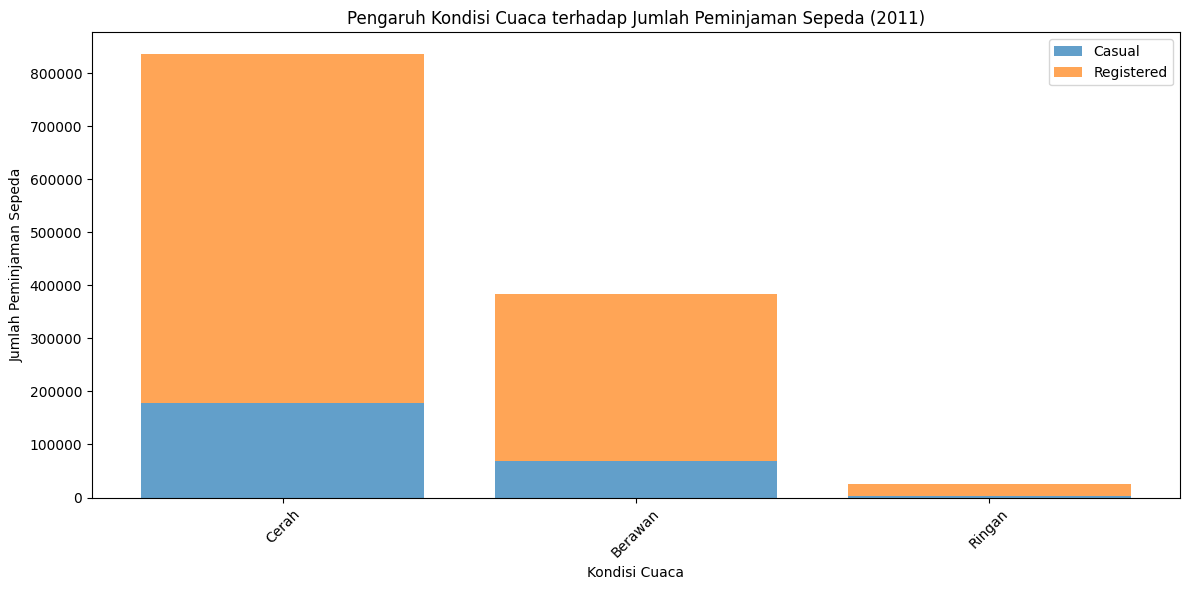

In [42]:
df_2011 = df_day[df_day['dteday'].dt.year == 2011]
weather_data = df_2011.groupby('weathersit').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

weather_mapping = {1: 'Cerah', 2: 'Berawan', 3: 'Ringan'}
weather_data['weathersit'] = weather_data['weathersit'].map(weather_mapping)

plt.figure(figsize=(12, 6))
plt.bar(weather_data['weathersit'], weather_data['casual'], label='Casual', alpha=0.7)
plt.bar(weather_data['weathersit'], weather_data['registered'], bottom=weather_data['casual'], label='Registered', alpha=0.7)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda (2011)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 2:
Bagaimana Perbedaan tren penggunaan sepeda antara musim panas dan musim dingin oleh pengguna terdaftar pada tahun 2011


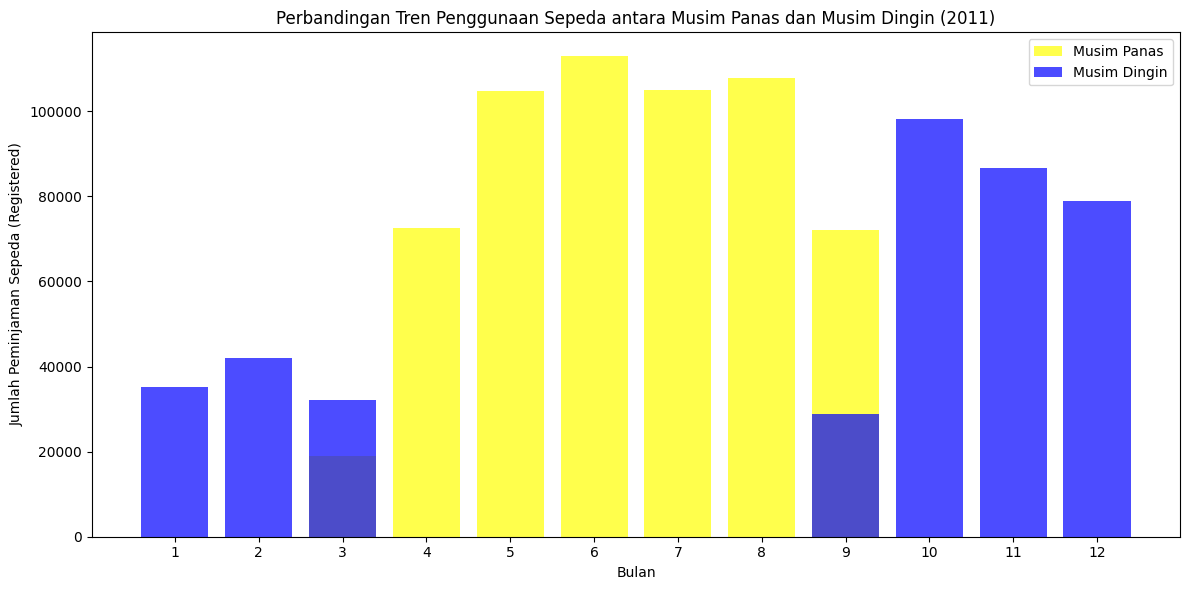

In [43]:
df_summer = df_2011[(df_2011['season'] == 2) | (df_2011['season'] == 3)]
df_winter = df_2011[(df_2011['season'] == 1) | (df_2011['season'] == 4)]

summer_trend = df_summer.groupby(df_summer['dteday'].dt.month)['registered'].sum()
winter_trend = df_winter.groupby(df_winter['dteday'].dt.month)['registered'].sum()

plt.figure(figsize=(12, 6))
plt.bar(summer_trend.index, summer_trend.values, color='yellow', label='Musim Panas', alpha=0.7)
plt.bar(winter_trend.index, winter_trend.values, color='blue', label='Musim Dingin', alpha=0.7)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman Sepeda (Registered)')
plt.title('Perbandingan Tren Penggunaan Sepeda antara Musim Panas dan Musim Dingin (2011)')
plt.legend()
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

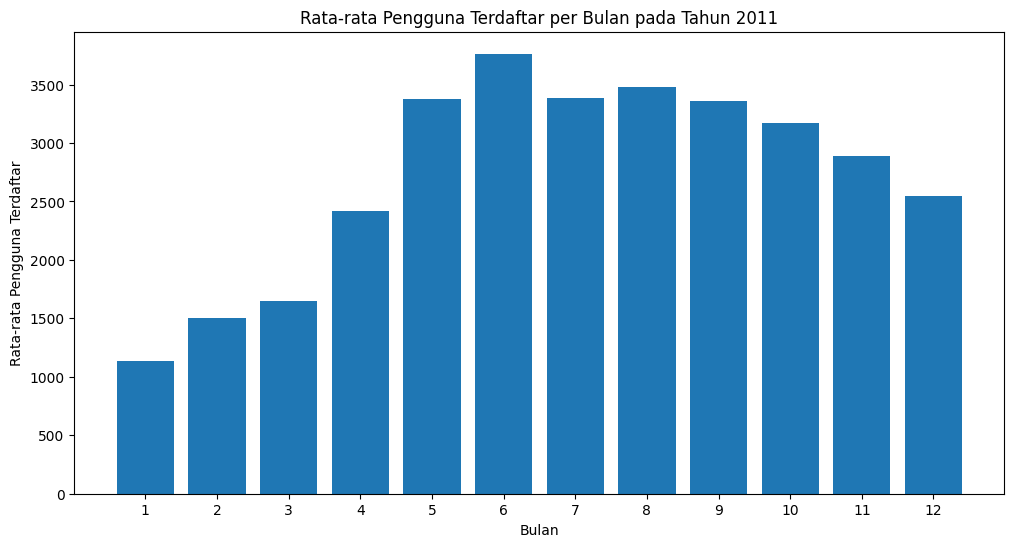

In [44]:
#datahighstligh
monthly_registered_users = df_2011.groupby(df_2011['dteday'].dt.month)['registered'].mean()
plt.figure(figsize=(12, 6))
plt.bar(monthly_registered_users.index, monthly_registered_users.values)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Pengguna Terdaftar')
plt.title('Rata-rata Pengguna Terdaftar per Bulan pada Tahun 2011')
plt.xticks(monthly_registered_users.index)
plt.show()


**Insight:**
1. Kondisi cuaca berpengaruh signifikan terhadap jumlah peminjaman sepeda, di mana cuaca cerah mendorong peningkatan penggunaan sepeda terutama oleh pengguna casual, sementara pengguna terdaftar tetap memiliki pola peminjaman yang lebih stabil meskipun cuaca buruk. Untuk meningkatkan jumlah peminjaman di berbagai kondisi cuaca, layanan penyewaan sepeda dapat menyediakan insentif seperti diskon saat cuaca mendung atau hujan ringan serta meningkatkan fasilitas penunjang seperti tempat berteduh dan perlengkapan pelindung hujan.

2. Peminjaman sepeda oleh pengguna terdaftar meningkat signifikan selama musim panas karena cuaca yang lebih nyaman, sedangkan selama musim dingin terjadi penurunan drastis akibat suhu rendah dan kondisi cuaca ekstrem yang menghambat aktivitas bersepeda.Strategi yang berfokus pada peningkatan kenyamanan selama musim dingin, seperti penyediaan sepeda dengan perlengkapan tahan cuaca atau jalur sepeda yang lebih terjaga dari es dan salju, dapat membantu menjaga stabilitas penggunaan sepanjang tahun.

## **Conclusion**

- Kesimpulan
Cuaca buruk mengurangi peminjaman sepeda terutama oleh pengguna casual, sedangkan pengguna registered tetap stabil.
peminjaman meningkat di musim panas dan menurun drastis di musim dingin, perbedaan pola peminjaman antara hari kerja dan akhir pekan menunjukkan peningkatan di jam sibuk, terutama pagi dan sore hari. Faktor cuaca dapat digunakan sebagai indikator dalam perencanaan jumlah sepeda dan titik sewa optimal untuk meningkatkan efisiensi layanan.

- Rekomendasi:
Tim dapat menerapkan diskon saat cuaca buruk, menyediakan sepeda tahan cuaca, meluncurkan promosi musim dingin, meningkatkan infrastruktur jalur sepeda, menambah jumlah sepeda di titik strategis saat jam sibuk, serta mengembangkan sistem pemesanan online untuk memudahkan akses pengguna. Pemanfaatan teknologi seperti analisis prediktif dapat membantu dalam manajemen ketersediaan sepeda secara real-time untuk menyesuaikan dengan tren penggunaan.

- Saran
Diperlukan analisis lebih lanjut terkait dampak cuaca dan musim terhadap tren peminjaman, pemanfaatan model prediktif untuk optimalisasi sumber daya, serta evaluasi berkala terhadap strategi promosi dan program loyalitas guna meningkatkan efektivitas layanan. Wawasan baru: Integrasi data eksternal seperti prakiraan cuaca dan pola mobilitas kota dapat memberikan insight lebih mendalam untuk pengambilan keputusan strategis.

